In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Step 1: Load the dataset
data = pd.read_csv("train.csv")
print('dataset shape')
print(data.shape)
print("First few rows of the dataset:")
print(data.head(10))

dataset shape
(1460, 81)
First few rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN   

In [ ]:
# Step 2: Display dataset information and statistical summaries
print("\nDataset info:")
print(data.info())
print("\nStatistical summary:")
print(data.describe())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

In [ ]:
# Step 3: Assign GrLivArea to x and SalePrice to y
x = data["GrLivArea"]
y = data["SalePrice"]

In [ ]:
datadesc = data.describe()

In [ ]:
datadesc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


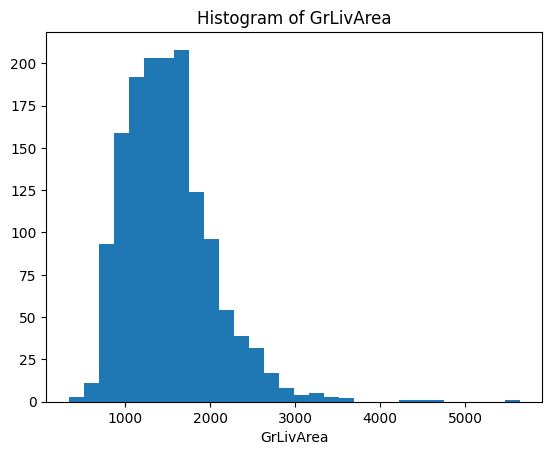

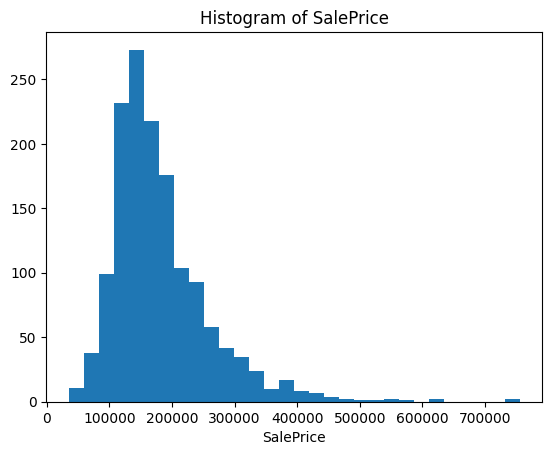

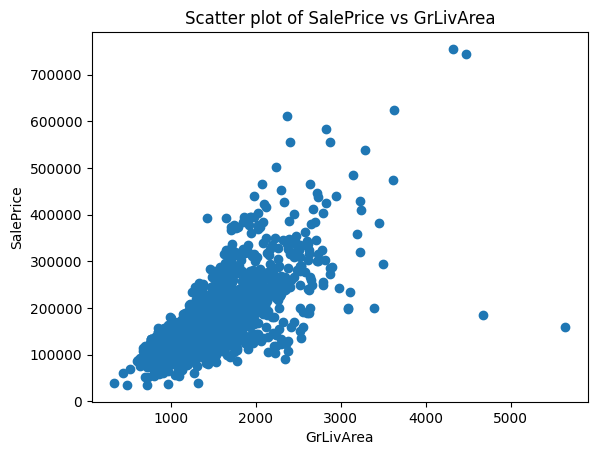

In [ ]:
# Step 4: Plot histograms for x and y
plt.figure()
plt.hist(x, bins=30)
plt.xlabel("GrLivArea")
plt.title("Histogram of GrLivArea")
plt.show()

plt.figure()
plt.hist(y, bins=30)
plt.xlabel("SalePrice")
plt.title("Histogram of SalePrice")
plt.show()

# Step 5: Scatter plot of SalePrice vs GrLivArea
plt.scatter(x, y)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Scatter plot of SalePrice vs GrLivArea")
plt.show()

In [ ]:
# Step 6: Calculate intercept and slope manually
x_mean = np.mean(x)
y_mean = np.mean(y)
a_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b_hat = y_mean - a_hat * x_mean
simple_ml_estim = np.array([a_hat, b_hat])
print("\nManual estimators (simple_ml_estim):", simple_ml_estim)


Manual estimators (simple_ml_estim): [  107.13035897 18569.02585649]


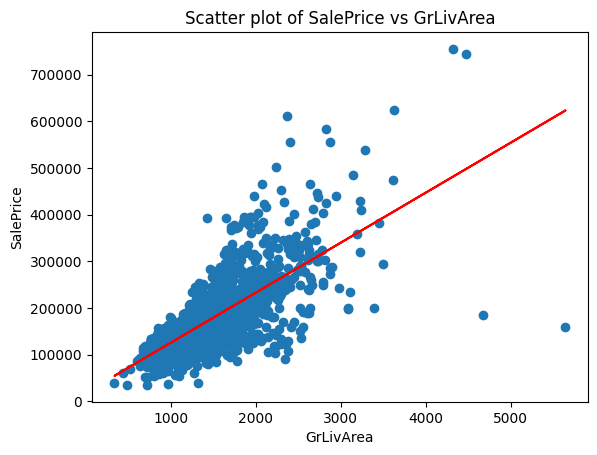

In [ ]:
plt.scatter(x, y)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Scatter plot of SalePrice vs GrLivArea")
y_pred = a_hat * x + b_hat
plt.plot(x, y_pred, color='red')
plt.show()

In [ ]:
X = np.vstack([np.ones(len(x)), x]).T

In [ ]:
# Step 7: Calculate estimators using the normal equation
X = np.vstack([np.ones(len(x)), x]).T
normal_ml_estim = np.linalg.inv(X.T @ X) @ X.T @ y
print("\nEstimators using normal equation (normal_ml_estim):", normal_ml_estim)


Estimators using normal equation (normal_ml_estim): [18569.02585649   107.13035897]


In [ ]:
x.values.shape

(1460,)

In [ ]:
x.values.reshape(-1, 1).shape

(1460, 1)

In [ ]:
# Step 8: Fit model using scikit-learn LinearRegression
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)
r_ml_estim = np.array([model.intercept_, model.coef_[0]])
print("\nEstimators using LinearRegression (r_ml_estim):", r_ml_estim)




Estimators using LinearRegression (r_ml_estim): [18569.02585649   107.13035897]


In [ ]:
# Step 9: Test equality of estimators
print("\nAre estimators equal?", np.allclose(simple_ml_estim, normal_ml_estim) and np.allclose(normal_ml_estim, r_ml_estim))



Are estimators equal? False


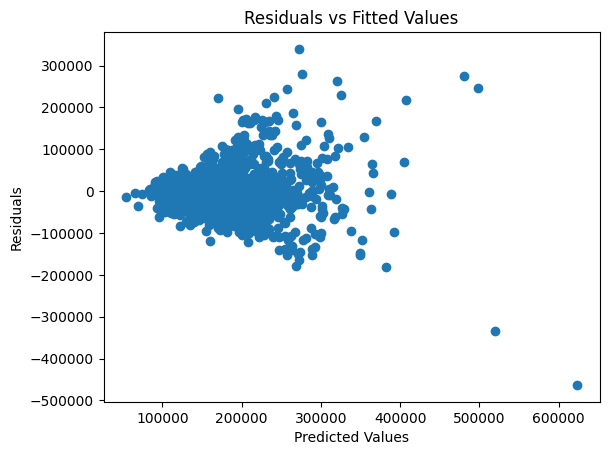

In [ ]:
# Step 10: Residual analysis
y_pred = model.predict(x.values.reshape(-1, 1))
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

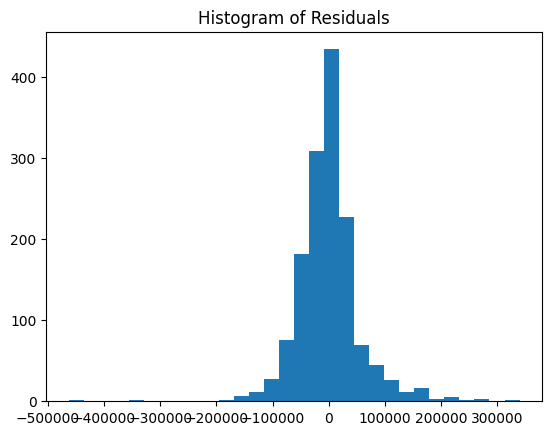

In [ ]:
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

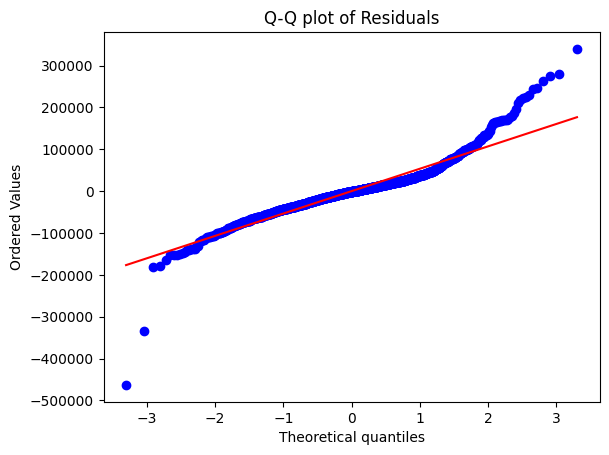

In [ ]:
# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of Residuals")
plt.show()

In [ ]:

# let's apply log on x and y and apply the regression again
x_log = np.log(x)
y_log = np.log(y)
model_log = LinearRegression()
model_log.fit(x_log.values.reshape(-1, 1), y_log)
y_log_pred = model_log.predict(x_log.values.reshape(-1, 1))
residuals_log = y_log - y_log_pred

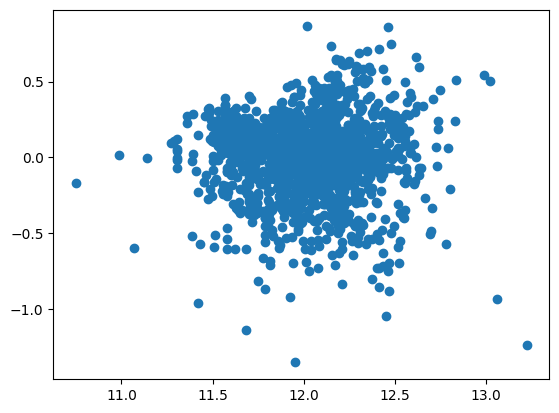

In [ ]:
# plot residuals vs fitted values
plt.scatter(y_log_pred, residuals_log)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-1.35337565, -1.23942732, -1.13805236, ...,  0.75116505,
          0.86231449,  0.86376991])),
 (np.float64(0.27021154224481875),
  np.float64(-5.613931512569422e-16),
  np.float64(0.9885306612249722)))

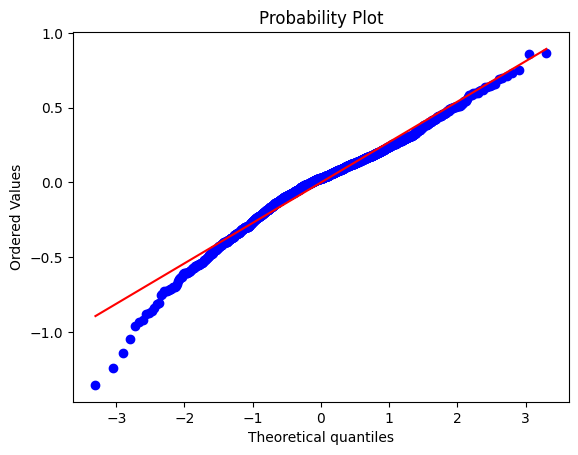

In [ ]:
#qqlot
stats.probplot(residuals_log, dist="norm", plot=plt)

In [ ]:
# Step 13: Calculate unbiased variance estimate of errors
SSR = np.sum(residuals_log*residuals_log)
n = len(y)
p = 2  # Number of coefs
sigma_squared = SSR / (n - p)
print("\nVariance of error terms:", sigma_squared)


Variance of error terms: 0.07452301206044987


In [ ]:
X_log = np.vstack([np.ones(len(x)), x_log]).T

In [ ]:
var_X_log = sigma_squared * np.linalg.inv(X_log.T@X_log)

In [ ]:
var_X_log

array([[ 0.02430122, -0.00333667],
       [-0.00333667,  0.00045911]])

In [ ]:
std_of_estimators = np.sqrt(np.diag(var_X_log))
print("\nStandard errors of estimators:", std_of_estimators)


Standard errors of estimators: [0.1558885  0.02142674]


In [ ]:
estimators_log= np.array([model_log.intercept_, model_log.coef_[0]])

In [ ]:
# Step 15: Compute t-values for each coefficient
t_values = estimators_log / std_of_estimators
print("\nT-values for estimators:", t_values)


T-values for estimators: [36.36012087 40.81514592]


In [ ]:
# Step 16: Statistical test for significance at 1% level
alpha = 0.01
t_critical = stats.t.ppf(1 - alpha / 2, df=n - p)
print("\nCritical t-value:", t_critical)


Critical t-value: 2.5792055812052865


In [ ]:
significant = np.abs(t_values) > t_critical
print("Significance of coefficients:", significant)

Significance of coefficients: [ True  True]


In [ ]:
# Step 17: Calculate p-values
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=n - p))
print("\nP-values:", p_values)


P-values: [0. 0.]


In [ ]:
# Step 18: Compare with statsmodels summary output
X_with_intercept = sm.add_constant(x_log)
sm_model = sm.OLS(y_log, X_with_intercept).fit()
print("\nStatsmodels summary:")
print(sm_model.summary())


Statsmodels summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1666.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          1.60e-243
Time:                        10:04:26   Log-Likelihood:                -175.10
No. Observations:                1460   AIC:                             354.2
Df Residuals:                    1458   BIC:                             364.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6681      0.1

In [ ]:
# Step 19: 95% confidence intervals for coefficients
conf_intervals = sm_model.conf_int(alpha=0.01)
print("95% confidence intervals for coefficients:", conf_intervals)

95% confidence intervals for coefficients:                   0         1
const      5.266056  6.070193
GrLivArea  0.819271  0.929799


In [ ]:
# Step 20: Prediction intervals for the first 10 observations
preds = sm_model.get_prediction(X_with_intercept[:10])
pred_interval = preds.conf_int()
print("\nPrediction intervals for first 10 observations:\n", pred_interval)


Prediction intervals for first 10 observations:
 [[12.16252759 12.19424021]
 [11.89770243 11.92770533]
 [12.199624   12.23320234]
 [12.16601921 12.19789391]
 [12.37515178 12.42072811]
 [11.96521495 11.99357073]
 [12.15448722 12.18583796]
 [12.3327191  12.37503597]
 [12.19388258 12.22715223]
 [11.75561475 11.79253315]]


In [ ]:
preds = sm_model.get_prediction(X_with_intercept)

In [ ]:
y_hat = preds.predicted_mean
y_log_mean = np.mean(y_log)


In [ ]:
np.sum((y_hat - y_log_mean)**2)/np.sum((y_log - y_log_mean)**2)

np.float64(0.5332721476985469)

In [ ]:
# Step 21: Calculate R-squared and evaluate model fit
r_squared = sm_model.rsquared
print("\nR-squared value:", r_squared)
print("Model evaluation based on R-squared:", "Good fit" if r_squared > 0.7 else "Consider revisiting the model")


R-squared value: 0.5332721476985477
Model evaluation based on R-squared: Consider revisiting the model


In [ ]:
index_unique = data.nunique()
index_unique[index_unique ==2]

,0
Street,2
Alley,2
Utilities,2
CentralAir,2


In [ ]:
data.CentralAir.value_counts()
x_central_air = (data.CentralAir == 'Y').astype(int)

In [ ]:
classes_neib = data.Neighborhood.unique()
df_Neighborhood = pd.DataFrame({  'Neighborhood_'+classe: (data.Neighborhood == classe).astype(int) for classe in classes_neib[:-1]})
df_Neighborhood.shape

(1460, 24)

In [ ]:
X = np.vstack([np.ones(len(x)), x, x_central_air]).T

In [ ]:
X = np.hstack([X, df_Neighborhood.values])

In [ ]:
normal_ml_estim = np.linalg.inv(X.T @ X) @ X.T @ y
print("\nEstimators using normal equation (normal_ml_estim):", normal_ml_estim)


Estimators using normal equation (normal_ml_estim): [ 1.69955463e+03  7.74790517e+01  2.79108658e+04  5.36476168e+04
  8.98727413e+04  4.49385877e+04  1.11301294e+05  2.63859970e+04
  7.20623987e+04  2.55728283e+04 -9.61089170e+03  7.78565054e+03
  1.37895444e+04  1.38214365e+05  1.57073835e+04  3.38380410e+04
 -6.67553219e+03 -1.30797081e+04 -1.91793098e+02  7.70976205e+04
  3.64297454e+04  1.35299243e+05  4.44141623e+04  1.60027722e+04
  5.46249336e+04 -1.36897539e+04 -1.87623852e+04]


In [ ]:
X = np.vstack([np.ones(len(x)), x]).T
normal_ml_estim = np.linalg.inv(X.T @ X) @ X.T @ y
print("\nEstimators using normal equation (normal_ml_estim):", normal_ml_estim)

In [ ]:



roof_dummies = pd.get_dummies(data.RoofStyle, prefix='RoofStyle')
data.RoofStyle.value_counts()


,count
RoofStyle,
Gable,1141
Hip,286
Flat,13
Gambrel,11
Mansard,7
Shed,2


In [ ]:
unique_roof_styles = data['RoofStyle'].unique()
RoofStyle_dummies = pd.DataFrame({ 'RoofStyle'+style:(data['RoofStyle'] == style).astype(int) for style in unique_roof_styles[:-1]})


RoofStyle_dummies

,RoofStyleGable,RoofStyleHip,RoofStyleGambrel,RoofStyleMansard,RoofStyleFlat
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1455,1,0,0,0,0
1456,1,0,0,0,0
1457,1,0,0,0,0
1458,0,1,0,0,0


In [ ]:
X

,GrLivArea,OverallQual,TotalBsmtSF,GarageArea,GrLivArea_sq,OverallQual_sq,TotalBsmtSF_sq,GarageArea_sq,LivArea_per_Qual,TotalBsmtSF_per_GrLivArea,GarageArea_per_GrLivArea
0,1710,7,856,548,2924100,49,732736,300304,244.285714,0.500585,0.320468
1,1262,6,1262,460,1592644,36,1592644,211600,210.333333,1.000000,0.364501
2,1786,7,920,608,3189796,49,846400,369664,255.142857,0.515118,0.340426
3,1717,7,756,642,2948089,49,571536,412164,245.285714,0.440303,0.373908
4,2198,8,1145,836,4831204,64,1311025,698896,274.750000,0.520928,0.380346
...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,6,953,460,2712609,36,908209,211600,274.500000,0.578628,0.279296
1456,2073,6,1542,500,4297329,36,2377764,250000,345.500000,0.743849,0.241196
1457,2340,7,1152,252,5475600,49,1327104,63504,334.285714,0.492308,0.107692
1458,1078,5,1078,240,1162084,25,1162084,57600,215.600000,1.000000,0.222635


In [ ]:
# build better model based on multiple linear regression and feature transformation


In [ ]:
# prompt: build better model based on multiple linear regression and feature transformation

# Feature Engineering (Example: Adding interaction term)
data['Interaction'] = data['GrLivArea'] * data['OverallQual']

# Selecting features for the multiple linear regression model
features = ['GrLivArea', 'OverallQual', 'Interaction', 'TotalBsmtSF', 'GarageArea']  # Include more relevant features
X = data[features]
y = data['SalePrice']

# Handling missing values (if any) -  replace with mean for simplicity
X.fillna(X.mean(), inplace=True)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Fitting the multiple linear regression model
X2 = sm.add_constant(X_scaled) # adding a constant
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# Model Evaluation
r_squared = est2.rsquared
print("\nR-squared value:", r_squared)
print("Model evaluation based on R-squared:", "Good fit" if r_squared > 0.7 else "Consider revisiting the model")


# Further analysis and improvements:
# 1. Explore more features and their interactions.
# 2. Consider polynomial features for non-linear relationships.
# 3. Apply more robust feature selection techniques.
# 4. Handle outliers effectively.
# 5. Try different transformations (log, square root, etc.) on both features and target variable.
# 6. Evaluate model performance using different metrics (e.g., RMSE, MAE).
# 7. Consider regularization techniques (Ridge, Lasso) to prevent overfitting.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     971.5
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:04:26   Log-Likelihood:                -17472.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1454   BIC:                         3.499e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05    999.608    180.992      0.0

/tmp/ipython-input-3940302012.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
# prompt: let's add square to some fetaures and add more feature to go above 80

# Add square of existing features
data['GrLivArea_sq'] = data['GrLivArea']**2
data['OverallQual_sq'] = data['OverallQual']**2
data['TotalBsmtSF_sq'] = data['TotalBsmtSF']**2
data['GarageArea_sq'] = data['GarageArea']**2

# Add more features (example: ratios and combinations)
data['LivArea_per_Qual'] = data['GrLivArea'] / data['OverallQual']
data['TotalBsmtSF_per_GrLivArea'] = data['TotalBsmtSF'] / data['GrLivArea']
data['GarageArea_per_GrLivArea'] = data['GarageArea'] / data['GrLivArea']


# Selecting features for the multiple linear regression model
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 'GrLivArea_sq', 'OverallQual_sq', 'TotalBsmtSF_sq', 'GarageArea_sq', 'LivArea_per_Qual', 'TotalBsmtSF_per_GrLivArea', 'GarageArea_per_GrLivArea']
X = data[features]
y = data['SalePrice']

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting the multiple linear regression model
X2 = sm.add_constant(X_scaled)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# Model evaluation
r_squared = est2.rsquared
print("\nR-squared value:", r_squared)
print("Model evaluation based on R-squared:", "Good fit" if r_squared > 0.8 else "Consider revisiting the model")

/tmp/ipython-input-3524340104.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     598.7
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:04:26   Log-Likelihood:                -17293.
No. Observations:                1460   AIC:                         3.461e+04
Df Residuals:                    1448   BIC:                         3.467e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05    886.048    204.189      0.0